<a href="https://colab.research.google.com/github/deepacu1986/DATA-SCIENCE-ASSIGNMENTS/blob/main/ANNAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ARTIFICIAL NEURAL NETWORKS
Classification Using Artificial Neural Networks with Hyperparameter Tuning on Alphabets Data
Overview
In this assignment, you will be tasked with developing a classification model using Artificial Neural Networks (ANNs) to classify data points from the "Alphabets_data.csv" dataset into predefined categories of alphabets. This exercise aims to deepen your understanding of ANNs and the significant role hyperparameter tuning plays in enhancing model performance.
Dataset: "Alphabets_data.csv"
The dataset provided, "Alphabets_data.csv", consists of labeled data suitable for a classification task aimed at identifying different alphabets. Before using this data in your model, you'll need to preprocess it to ensure optimal performance.
Tasks
1. Data Exploration and Preprocessing
●	Begin by loading and exploring the "Alphabets_data.csv" dataset. Summarize its key features such as the number of samples, features, and classes.
●	Execute necessary data preprocessing steps including data normalization, managing missing values.
2. Model Implementation
●	Construct a basic ANN model using your chosen high-level neural network library. Ensure your model includes at least one hidden layer.
●	Divide the dataset into training and test sets.
●	Train your model on the training set and then use it to make predictions on the test set.
3. Hyperparameter Tuning
●	Modify various hyperparameters, such as the number of hidden layers, neurons per hidden layer, activation functions, and learning rate, to observe their impact on model performance.
●	Adopt a structured approach like grid search or random search for hyperparameter tuning, documenting your methodology thoroughly.
4. Evaluation
●	Employ suitable metrics such as accuracy, precision, recall, and F1-score to evaluate your model's performance.
●	Discuss the performance differences between the model with default hyperparameters and the tuned model, emphasizing the effects of hyperparameter tuning.
Evaluation Criteria
●	Accuracy and completeness of the implementation.
●	Proficiency in data preprocessing and model development.
●	Systematic approach and thoroughness in hyperparameter tuning.
●	Depth of evaluation and discussion.
●	Overall quality of the report.
Additional Resources
●	TensorFlow Documentation
●	Keras Documentation
We wish you the best of luck with this assignment. Enjoy exploring the fascinating world of neural networks and the power of hyperparameter tuning!



> Add blockquote



In [ ]:
!pip install keras
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.datasets import mnist


In [ ]:
df=pd.read_csv('/content/Alphabets_data.csv')
df.head(2)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [ ]:
df.letter.values

array(['T', 'I', 'D', ..., 'T', 'S', 'A'], dtype=object)

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features=scaler.fit_transform(df.drop('letter', axis=1))
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(df["letter"])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(features,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16000, 16)
(4000, 16)
(16000,)
(4000,)


In [ ]:
# Model building

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(58, activation='relu'),

    tf.keras.layers.Dense(26, activation='softmax')  # Assuming 26 alphabet classes
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 58)             │         3,770 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 26)             │         1,534 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,392 (24.97 KB)

 Trainable params: 6,392 (24.97 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early=EarlyStopping(monitor='val_accuracy',patience=6)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train_encoded,batch_size=2000,epochs=12,validation_data=(x_test,y_test_encoded),callbacks=[early])

Epoch 1/12
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.0787 - loss: 3.2986 - val_accuracy: 0.1082 - val_loss: 3.1737
Epoch 2/12
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1264 - loss: 3.1294 - val_accuracy: 0.1720 - val_loss: 3.0187
Epoch 3/12
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1962 - loss: 2.9760 - val_accuracy: 0.2578 - val_loss: 2.8662
Epoch 4/12
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2752 - loss: 2.8237 - val_accuracy: 0.3005 - val_loss: 2.7066
Epoch 5/12
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3160 - loss: 2.6545 - val_accuracy: 0.3340 - val_loss: 2.5370
Epoch 6/12
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3561 - loss: 2.4885 - val_accuracy: 0.3842 - val_loss: 2.3610
Epoch 7/12
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4043 - loss: 2.3120 - val_accuracy: 0.4410 - val_loss: 2.1840
Epoch 8/12
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4551 - loss: 2.1327 - val_accuracy: 0.4922 - val_loss: 2.0135


In [ ]:
## comparing training,testing accuracy

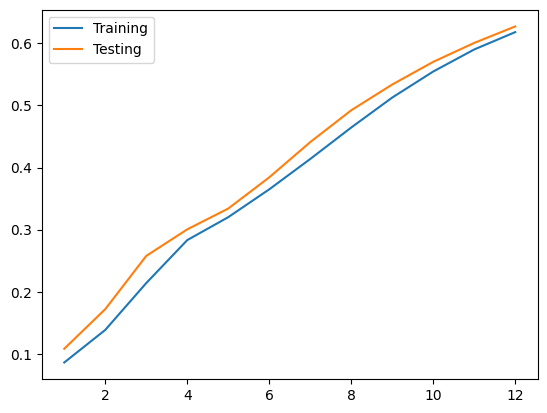

In [ ]:
plt.plot(range(1,13),history.history['accuracy'],label='Training')
plt.plot(range(1,13),history.history['val_accuracy'],label='Testing')
plt.legend()
plt.show()

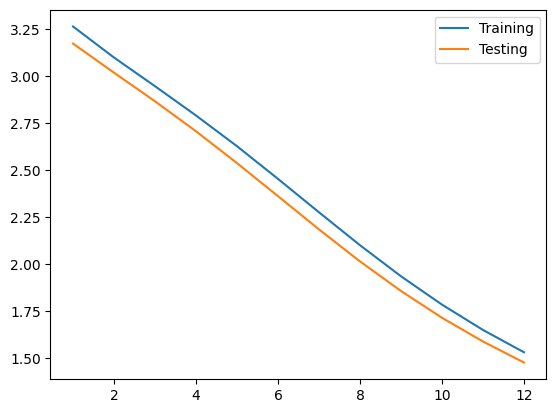

In [ ]:
plt.plot(range(1,13),history.history['loss'],label='Training')
plt.plot(range(1,13),history.history['val_loss'],label='Testing')
plt.legend()
plt.show()

In [ ]:
# hyper tuning

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00


In [ ]:
from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.optimizers import RMSprop,Adam,Adagrad
from keras.models import Sequential

from keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score
import keras

In [ ]:
from keras_tuner import RandomSearch

In [ ]:
def build_model1(hp):                 #hp means hyper parameters
    model=Sequential()
    model.add(Flatten(input_shape=x_train.shape[1]))
    #providing the range for hidden layers
    for i in range(hp.Int('num_of_layers',2,20)):
        #providing range for number of neurons in hidden layers
        model.add(Dense(units=hp.Int('num_of_neurons'+ str(i),min_value=32,max_value=512),
                                    activation='relu'))
    model.add(Dense(10,activation='softmax'))    #output layer
    #compiling the model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4])),   #tuning learning rate
                  loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
# Initialize the tuner
tuner = RandomSearch(
    build_model1,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=1,
    directory="alphabet_tuning",
    project_name="ann_classifier"
)

Reloading Tuner from alphabet_tuning/ann_classifier/tuner0.json


In [ ]:
tuner.search(x_train,y_train,epochs=3,validation_data=(x_test,y_test))

In [ ]:
tuner.results_summary()

Results summary
Results in alphabet_tuning/ann_classifier
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
num_layers: 2
units_0: 192
activation: relu
learning_rate: 0.01
units_1: 32
units_2: 224
Score: 0.9225000143051147

Trial 1 summary
Hyperparameters:
num_layers: 3
units_0: 96
activation: tanh
learning_rate: 0.001
units_1: 32
units_2: 32
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build

In [ ]:
# Random search

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras_tuner import RandomSearch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load and preprocess data
df = pd.read_csv("/content/Alphabets_data.csv")
X = df.drop("letter", axis=1)


scaler = StandardScaler()
X = scaler.fit_transform(X)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(df["letter"])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model builder function for tuner
def build_model1(hp):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(X_train.shape[1],)))

    # Tune number of hidden layers and units
    for i in range(hp.Int("num_layers", 1, 3)):
        model.add(keras.layers.Dense(units=hp.Int(f"units_{i}", min_value=32, max_value=256, step=32),
                                     activation=hp.Choice("activation", ["relu", "tanh"])))

    model.add(keras.layers.Dense(26, activation="softmax"))  # Adjust output layer for 26 classes

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

# Initialize the tuner
tuner = RandomSearch(
    build_model1,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=1,
    directory="alphabet_tuning",
    project_name="ann_classifier"
)

# Run the hyperparameter search
tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Get the best model and summary
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(1)[0]
best_model.summary()

Trial 3 Complete [00h 00m 13s]
val_accuracy: 0.9225000143051147

Best val_accuracy So Far: 0.9225000143051147
Total elapsed time: 00h 08m 21s


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 192)            │         3,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │           858 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,298 (40.23 KB)

 Trainable params: 10,298 (40.23 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
printclassification_report(y_test, y_pred.argmax(axis=1))


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step


'              precision    recall  f1-score   support\n\n           0       0.79      0.88      0.83       149\n           1       0.42      0.76      0.54       153\n           2       0.55      0.61      0.58       137\n           3       0.52      0.80      0.63       156\n           4       0.64      0.41      0.50       141\n           5       0.69      0.62      0.65       140\n           6       0.79      0.39      0.53       160\n           7       0.47      0.06      0.11       144\n           8       0.80      0.77      0.78       146\n           9       0.85      0.71      0.77       149\n          10       0.71      0.50      0.59       130\n          11       0.89      0.75      0.82       155\n          12       0.64      0.88      0.74       168\n          13       0.70      0.66      0.68       151\n          14       0.66      0.54      0.59       145\n          15       0.63      0.75      0.69       173\n          16       0.53      0.64      0.58       166\n       